      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


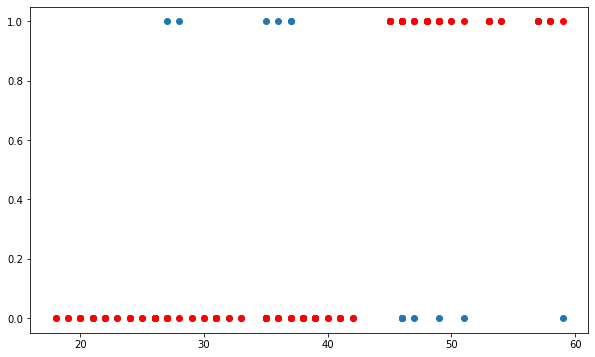

Accuracy = 0.825


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

data = pd.read_csv("Exp_8_dataset.csv")

x_train,x_test,y_train,y_test = train_test_split(data['Age'],data['Purchased'],test_size=0.20)

def normalize(X):
    return X-X.mean()

def predict(X, b0, b1):
    return np.array([1/(1+exp(-1*b0 + -1*b1*x)) for x in X])

def logistic_regression(X, Y):
    X = normalize(X)
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300
    
    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2*sum((Y-y_pred) * y_pred * (1-y_pred))
        D_b1 = -2*sum(X*(Y-y_pred) * y_pred * (1-y_pred))
        
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

b0, b1 = logistic_regression(x_train, y_train)

x_test_norm = normalize(x_test)
y_pred = predict(x_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred, c="red")
plt.show()

accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")